# Geocoder
The Geocoder represents a geocode service resource exposed by the GIS. It can find point locations of addresses, business names, and so on. The output points can be visualized on a map, inserted as stops for a route, or loaded as input for spatial analysis. It is also used to generate batch results for a set of addresses, as well as for reverse geocoding, i.e. determining the address at a particular x/y location.

## Accessing the geocoder
An instance of the Geocoder is available through the <code>gis.tools.geocoder</code> property, accessible from the GIS object.

In [1]:
from arcgis.gis import GIS
from IPython.display import display
from arcgis.tools import Geocoder

gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssw0rd")

# use the GIS's configured geocoder
geocoder = gis.tools.geocoder

## Creating a geocoder using a geocoding service item
Geocoding services can be published as items in the GIS. An instance of the geocoder can also be constructed by passing in a reference to these items from the GIS to the Geocoder's constructor:

<Item title:"World Geocoding" type:Geocoding Service owner:esri>
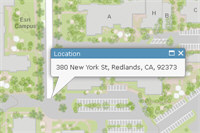

<Item title:"Esri Nederland BAG Geocoder" type:Geocoding Service owner:Esri_NL_Content>
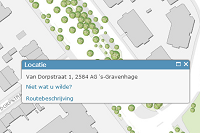

<Item title:"VGIN Composite Geocoder" type:Geocoding Service owner:VGIN>

In [2]:
items = gis.content.search('Geocoder', 'geocoding service', max_items=3)
for item in items: 
    display(item)
    
# construct a geocoder using the first geocoding service item
worldgeocoder = Geocoder(items[0])

<hr>
## Geocoder properties

Geocoders have several properties, listed below, that can be accessed on the geocoder object, as keys and values of a Python dictionary:

In [3]:
for key in geocoder.keys():
    print(key)

currentVersion
serviceDescription
addressFields
categories
singleLineAddressField
candidateFields
spatialReference
locatorProperties
countries
capabilities


Some of the important properties are described in detail below:

### Address Fields property
The Geocoder's 'addressFields' property specifies the various address fields accepted by it when geocoding addresses.

For instance, the address fields accepted by this geocoder, and their length, are the following:

In [4]:
for addrfld in geocoder['addressFields']:
    print(addrfld['name'] + " (" + str(addrfld['length']) +" chars)")

Address (100 chars)
Neighborhood (50 chars)
City (50 chars)
Subregion (50 chars)
Region (50 chars)
Postal (20 chars)
PostalExt (20 chars)
CountryCode (50 chars)


#### Single Line Address Field
The geocoder may also support a single line address field. Single field input is easier because the address parsing is done for you; however, multifield input may provide faster responses and more precise results. The field name can be found using the code below:

In [5]:
geocoder['singleLineAddressField']['name']

'SingleLine'

When using single line input for the address, it is unnecessary (though supported) to create a dict with this key and the single line address as it's value. The address can be passed in directly as a text string.

One instance of when you might use a dict to include the SingleLine parameter is when it is combined with the countryCode parameter. The SingleLine parameter cannot be used with any of the other multifield parameters.

#### Localized input field names
Developers integrating the geocoder into their application may need to know the appropriate input field names to use for the language and country of their users. This information can be obtained using the 'localizedNames' parameter of the address field. More information on this as well as the 'recognizedNames' parameter is avilable in the <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-localized-input-field-names.htm#ESRI_SECTION1_420C0A38D36546EDB1FC114048757B3E">Foreign language field names (World Geocoding Service)</a> documentation

For example, the code below lists the supported address fields and the corresponding input field names in Hindi:

In [7]:
for addrfld in geocoder['addressFields']:
    print(addrfld['name'], end='')
    print(": " + str(addrfld['localizedNames']['hi'] if 'hi' in addrfld['localizedNames'] else '-'))

Address: प्रमाचार
Neighborhood: इलाका
City: सिटी
Subregion: जनपद
Region: राष्ट्र
Postal: डाक - संबंधी
PostalExt: -
CountryCode: कंट्री कोड


### Categories property
	
The 'categories' property can be used to limit result to one or more categories. For example, "Populated Place" or "Scandinavian Food". Only applies to the World Geocode Service. See <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-category-filtering.htm#ESRI_SECTION1_502B3FE2028145D7B189C25B1A00E17B">Category filtering (World Geocoding Service)</a> for more information.

The following code lists the entire hierarchy of supported category values.

In [8]:
def list_categories(obj, depth = 0):       
    for category in obj['categories']:
        print('\t'*depth  + category['name'])
        if 'categories' in category:
            list_categories(category, depth + 1)
            
list_categories(geocoder)

Address
	Point Address
	Building Name
	Street Address
	Intersection
	Street Name
	Distance Marker
Postal
	Primary Postal
	Postal Locality
	Postal Extension
Coordinate System
	LatLong
	MGRS
Populated Place
	Neighborhood
	City
	Subregion
	Region
	Country
	Zone
POI
	Arts and Entertainment
		Amusement Park
		Aquarium
		Art Gallery
		Art Museum
		Billiards
		Bowling Alley
		Casino
		Cinema
		Historical Monument
		History Museum
		Indoor Sports
		Jazz Club
		Landmark
		Library
		Live Music
		Museum
		Other Arts and Entertainment
		Performing Arts
		Ruin
		Science Museum
		Tourist Attraction
		Wild Animal Park
		Zoo
	Education
		College
		Fine Arts School
		Other Education
		School
		Vocational School
	Food
		African Food
		American Food
		Argentinean Food
		Australian Food
		Austrian Food
		Bakery
		BBQ and Southern Food
		Belgian Food
		Bistro
		Brazilian Food
		Breakfast
		Brewpub
		British Isles Food
		Burgers
		Cajun and Creole Food
		Californian Food
		Caribbean Food
		Chicken Restauran

### Candidate Fields property
The CandidateFields property of the geocoder contains the fields that are returned for each candidate.

In [9]:
for addrfld in geocoder['candidateFields']:
    print(addrfld['name'])

Loc_name
Shape
Score
Match_addr
Addr_type
Type
PlaceName
Place_addr
Phone
URL
Rank
AddBldg
AddNum
AddNumFrom
AddNumTo
Side
StPreDir
StPreType
StName
StType
StDir
StAddr
Nbrhd
City
Subregion
Region
Postal
PostalExt
Country
LangCode
Distance
X
Y
DisplayX
DisplayY
Xmin
Xmax
Ymin
Ymax


### Spatial Reference property
The default spatial reference returned by the geocoder. The code below is querying the well known id of the default spatial reference of the geocoder.

In [10]:
geocoder['spatialReference']['wkid']

4326

### Locator properties
The geocoder has several important properties that are specified in the locatorProperties. 

These include the maximum number of addresses that can be geocoded in a single batch geocoding method call. The MaxBatchSize property defines this limit. For instance, if MaxBatchSize=2000, and 3000 addresses are passed in as input to the batch_geocode() method, only the first 2000 will be geocoded. 

The SuggestedBatchSize property is also useful as it specifies the optimal number of addresses to include in a single batch request.

The code below lists these useful locator properties.

In [12]:
for key, value in geocoder['locatorProperties'].items():
    print(key + " : "+ str(value))

UICLSID : {3D486637-6BCF-4A0C-83DB-A02D437FB8FC}
IntersectionConnectors : &amp; @ | and
SuggestedBatchSize : 150
MaxBatchSize : 1000
LoadBalancerTimeOut : 60
WriteXYCoordFields : TRUE
WriteStandardizedAddressField : FALSE
WriteReferenceIDField : FALSE
WritePercentAlongField : FALSE


<hr/>
# Geocoder Methods
## <a href="Geocoding.ipynb">geocode() method</a>
## <a href="Batch Geocoding.ipynb">batch_geocode() method</a>
## <a href="Reverse Geocoding.ipynb">reverse_geocode() method</a>
